In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# carrega o CSV original
df = pd.read_csv("../Data/ScreenTime vs MentalWellness.csv")

print("Shape:", df.shape)
df.info()


Shape: (400, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  exercise_minutes_per_week    400 non-null    int64  
 13  soc

In [18]:
# remover colunas vazias tipo Unnamed
df = df.loc[:, ~df.columns.str.contains("^Unnamed", na=False)]

# normalizar nomes
df.columns = (df.columns.str.strip()
              .str.replace(r"\s+", "_", regex=True)
              .str.replace("-", "_", regex=False)      # <— adiciona isto
              .str.replace(r"[^\w_]", "", regex=True)
              .str.lower())

# olhar para as categóricas principais
for col in ["gender", "occupation", "work_mode"]:
    if col in df.columns:
        print(f"\n{col}:\n", df[col].value_counts())



gender:
 gender
Female              222
Male                170
Non-binary/Other      8
Name: count, dtype: int64

occupation:
 occupation
Employed         207
Student          107
Self-employed     45
Unemployed        27
Retired           14
Name: count, dtype: int64

work_mode:
 work_mode
Remote       150
Hybrid       146
In-person    104
Name: count, dtype: int64


In [19]:
num_cols = [c for c in [
    "age","screen_time_hours","work_screen_hours","leisure_screen_hours",
    "sleep_hours","stress_level_0_10",
    "productivity_0_100","mental_wellness_index_0_100"
] if c in df.columns]

cat_cols = [c for c in ["gender","occupation","work_mode"] if c in df.columns]

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)


Numéricas: ['age', 'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours', 'sleep_hours', 'stress_level_0_10', 'productivity_0_100', 'mental_wellness_index_0_100']
Categóricas: ['gender', 'occupation', 'work_mode']


In [20]:
df[num_cols].describe()


,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,stress_level_0_10,productivity_0_100,mental_wellness_index_0_100
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,29.77750,9.024900,2.183075,6.841825,7.013175,8.150500,54.306500,20.326750
std,7.46608,2.491058,1.931321,2.220896,0.852421,2.094844,15.020054,20.376793
min,16.00000,1.000000,0.110000,0.890000,4.640000,0.000000,20.600000,0.000000
25%,24.00000,7.372500,0.695000,5.460000,6.397500,6.900000,43.600000,3.675000
50%,30.00000,9.090000,1.455000,6.700000,7.030000,8.800000,51.750000,14.800000
75%,35.00000,10.495000,3.012500,8.417500,7.640000,10.000000,63.000000,30.650000
max,60.00000,19.170000,12.040000,13.350000,9.740000,10.000000,100.000000,97.000000


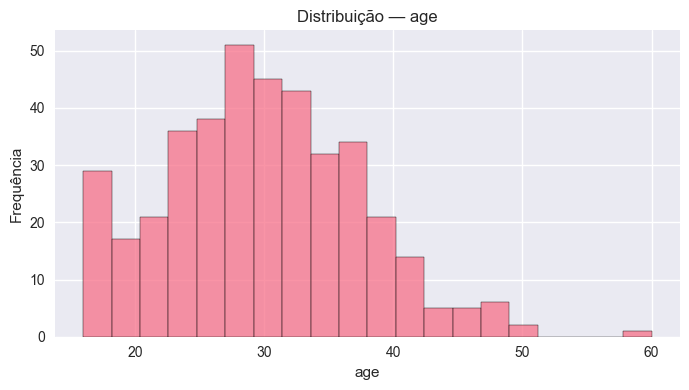

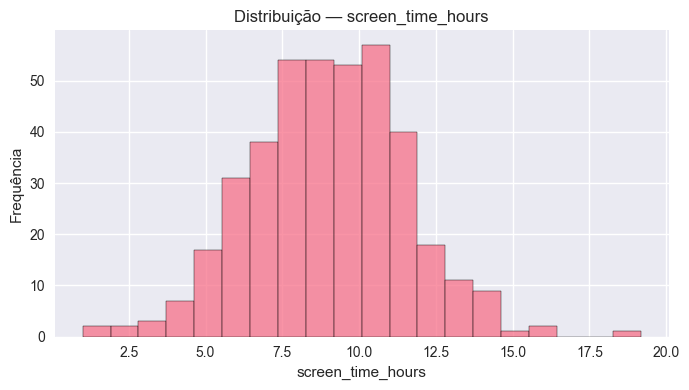

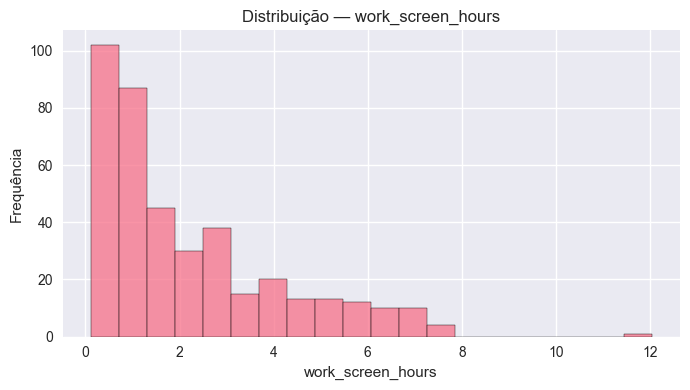

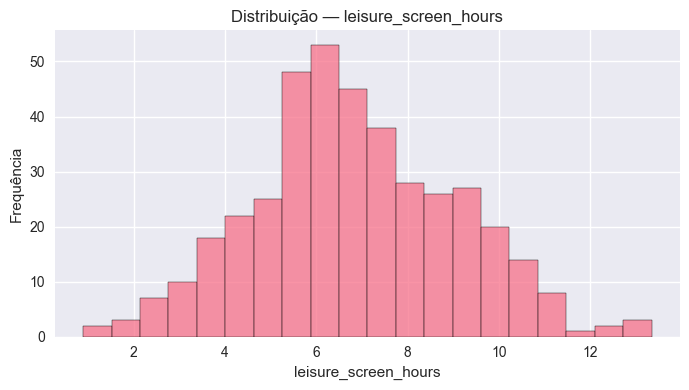

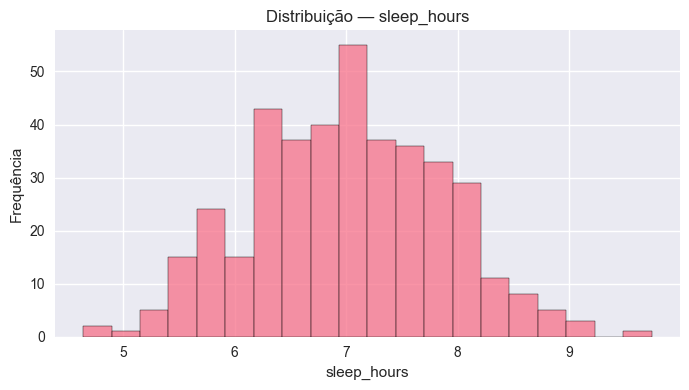

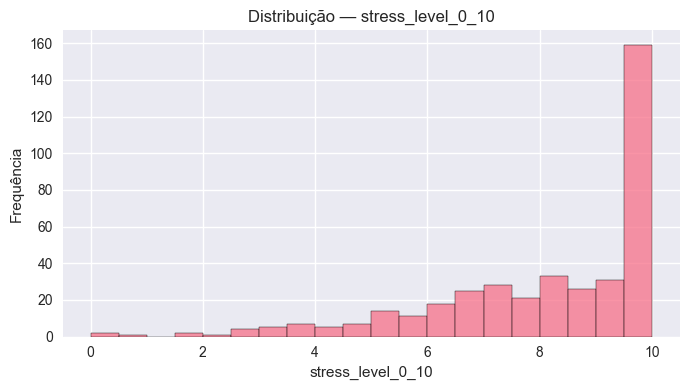

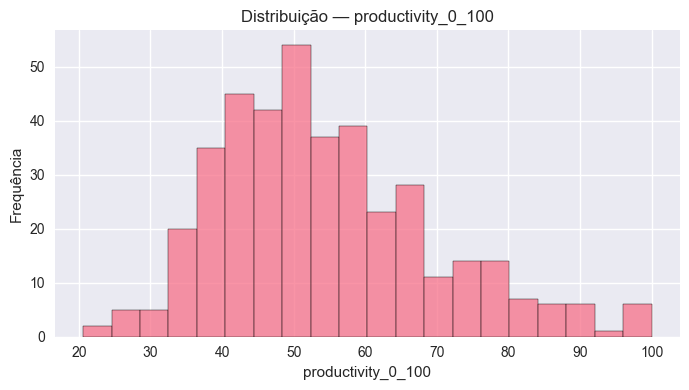

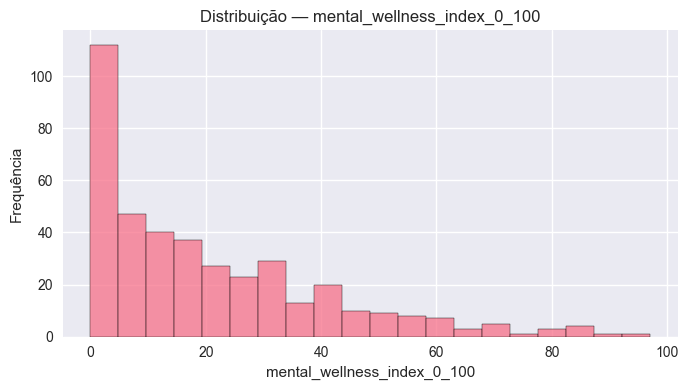

In [21]:
for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col].dropna(), bins=20, edgecolor="black")
    plt.title(f"Distribuição — {col}")
    plt.xlabel(col); plt.ylabel("Frequência")
    plt.tight_layout(); plt.show()


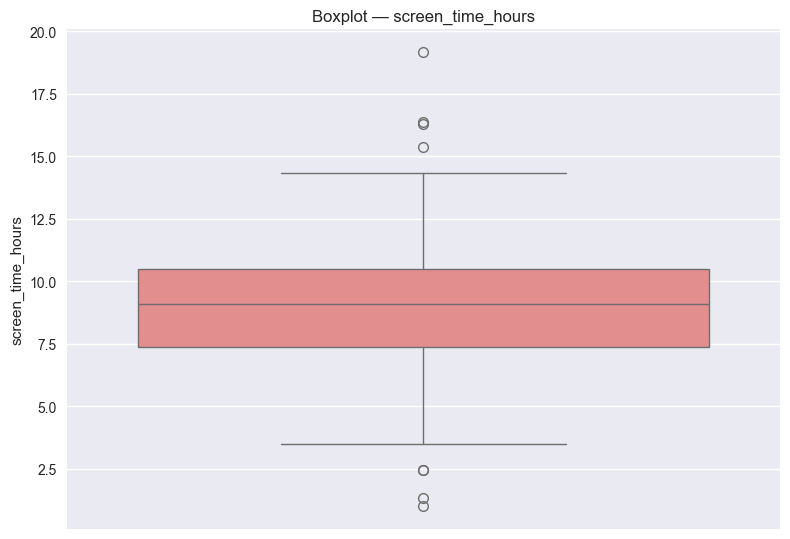

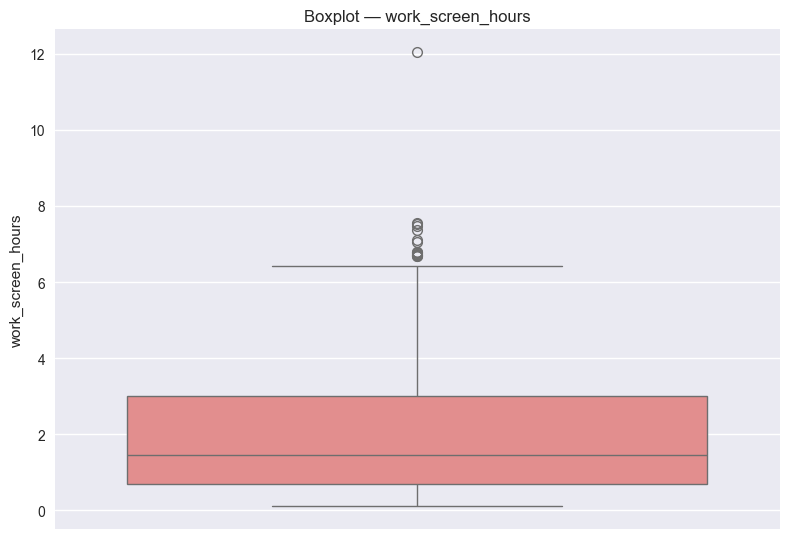

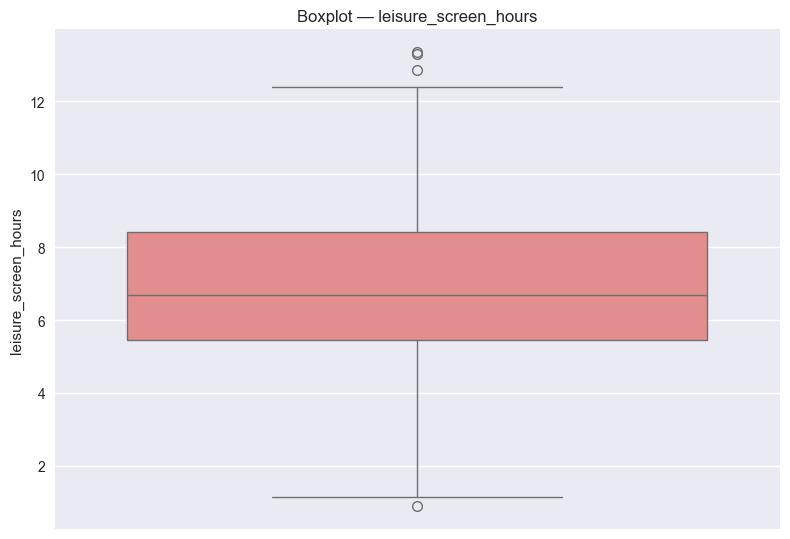

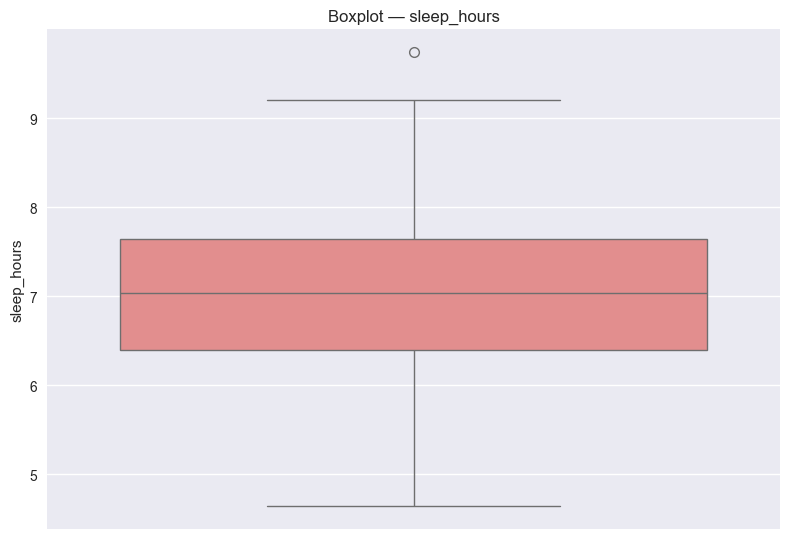

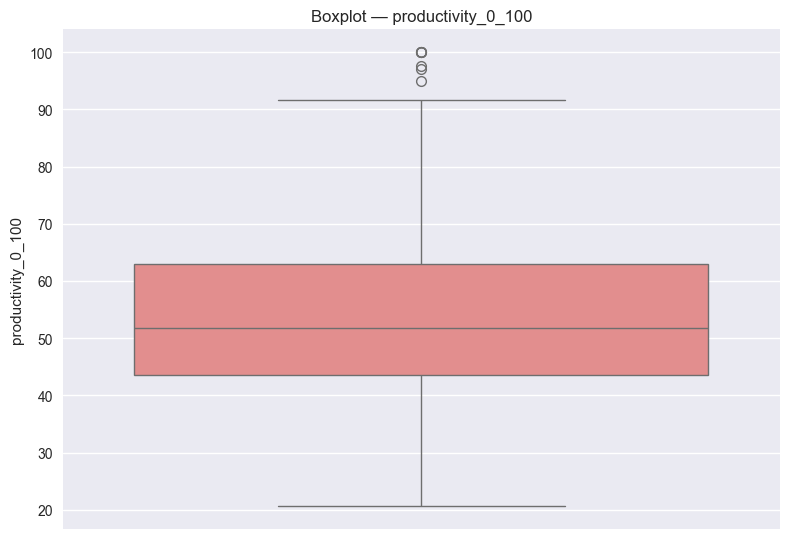

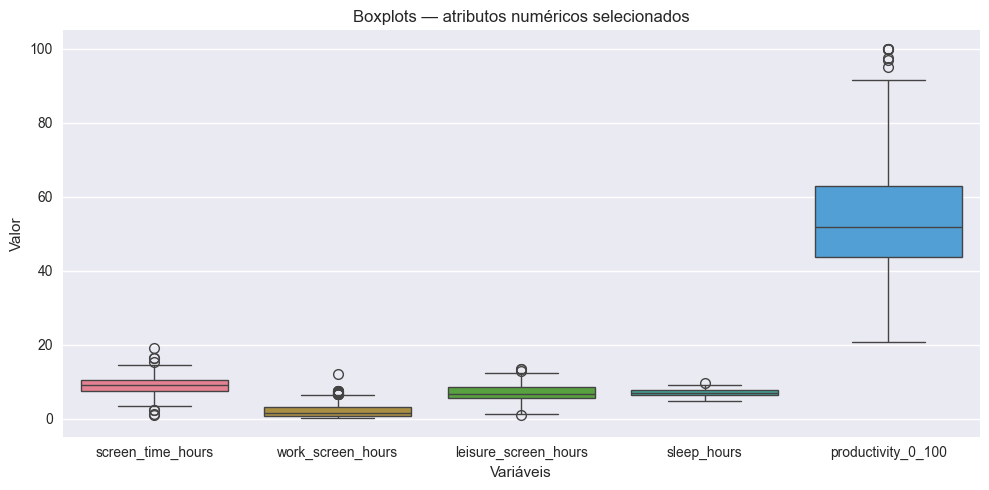

In [22]:
# individuais
for col in ["screen_time_hours","work_screen_hours","leisure_screen_hours","sleep_hours","productivity_0_100"]:
    if col in df.columns:
        sns.boxplot(y=df[col], color="lightcoral")  # 🔴 adiciona cor
    plt.title(f"Boxplot — {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()
# conjunto (NOVO)
box_cols = [c for c in ["screen_time_hours","work_screen_hours","leisure_screen_hours","sleep_hours","productivity_0_100"] if c in df.columns]
if box_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df[box_cols], orient="v")
    plt.title("Boxplots — atributos numéricos selecionados")
    plt.xlabel("Variáveis"); plt.ylabel("Valor")
    plt.tight_layout(); plt.show()


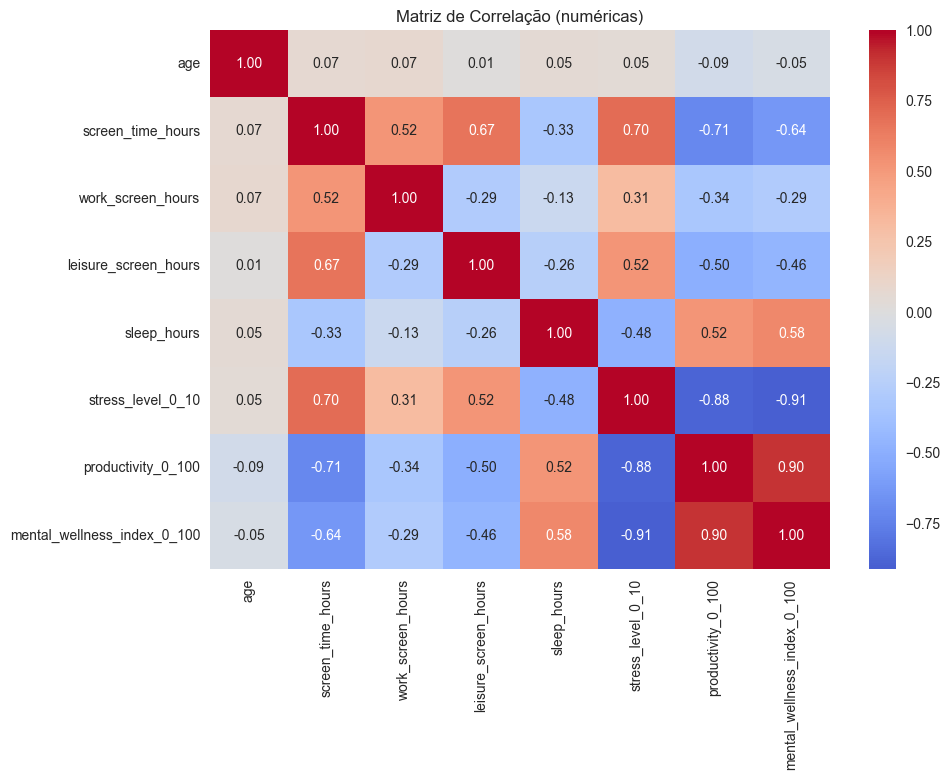

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(df[num_cols].corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlação (numéricas)")
plt.show()


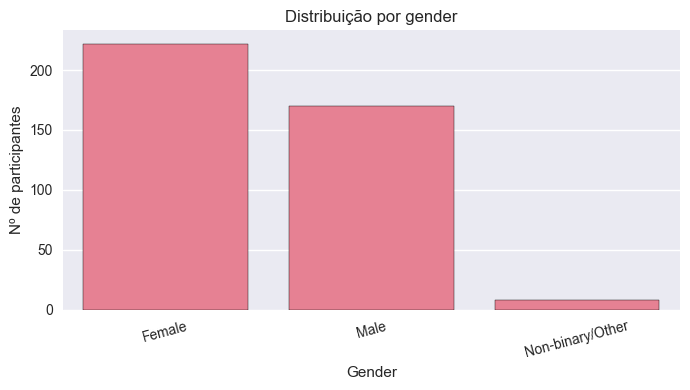

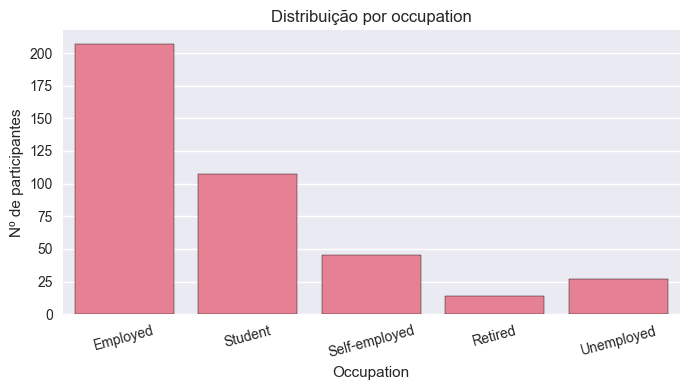

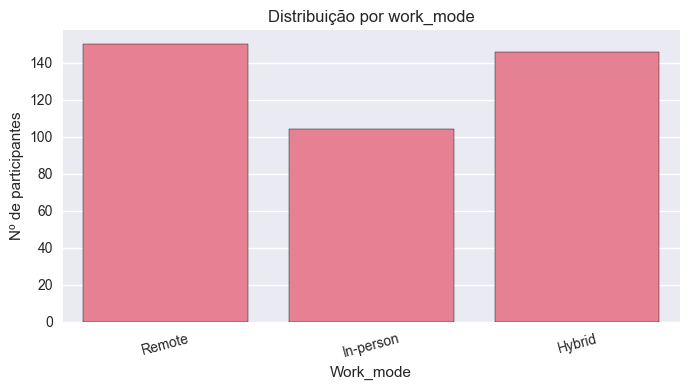

In [24]:
for col in cat_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, data=df, edgecolor="black")
    plt.title(f"Distribuição por {col}")
    plt.xlabel(col.capitalize()); plt.ylabel("Nº de participantes")
    plt.xticks(rotation=15); plt.tight_layout(); plt.show()


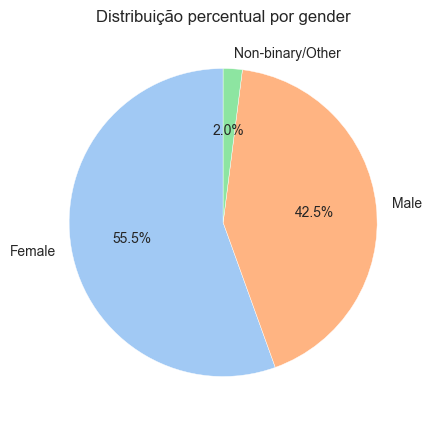

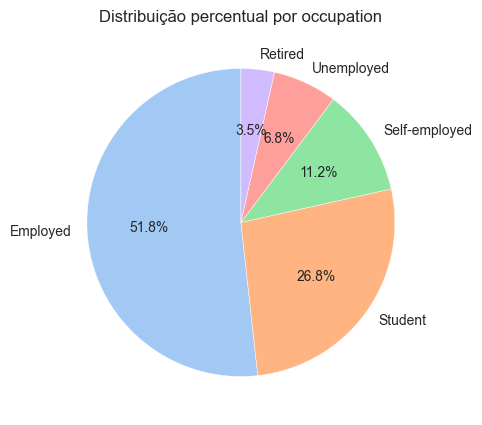

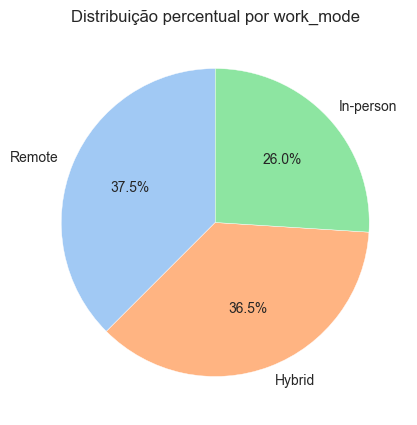

In [25]:
for col in cat_cols:
    plt.figure(figsize=(5,5))
    vc = df[col].value_counts()
    plt.pie(vc.values, labels=vc.index,
            autopct="%1.1f%%", startangle=90,
            colors=sns.color_palette("pastel"),   # 👈 igual às tuas imagens
            wedgeprops={"edgecolor":"white"})
    plt.title(f"Distribuição percentual por {col}")
    plt.show()


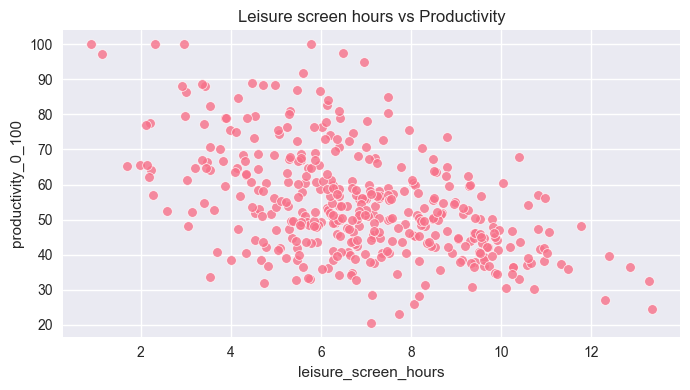

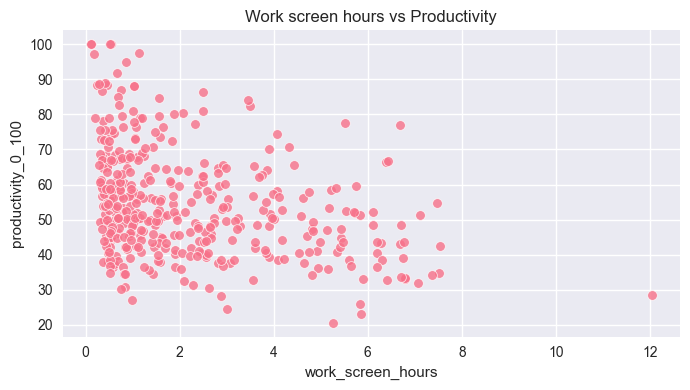

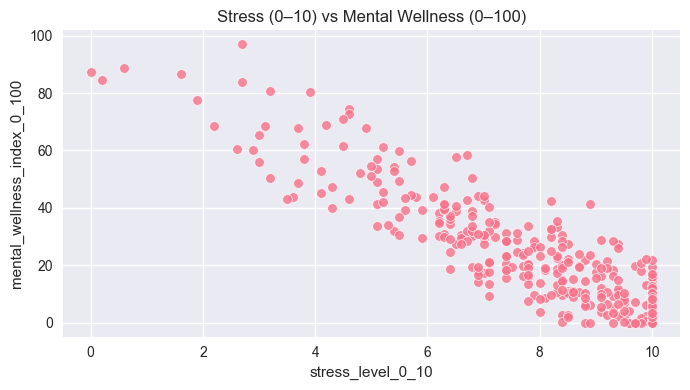

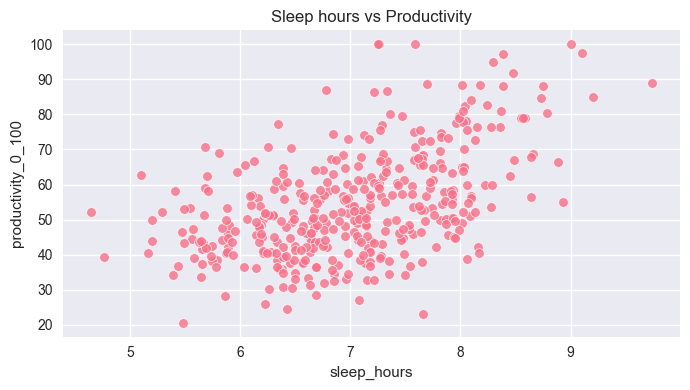

In [26]:
def has(*cols): return set(cols).issubset(df.columns)

# lazer vs produtividade
if has("leisure_screen_hours","productivity_0_100"):
    plt.figure(figsize=(7,4))
    sns.scatterplot(x="leisure_screen_hours", y="productivity_0_100", data=df, alpha=0.8)
    plt.title("Leisure screen hours vs Productivity"); plt.tight_layout(); plt.show()

# trabalho vs produtividade
if has("work_screen_hours","productivity_0_100"):
    plt.figure(figsize=(7,4))
    sns.scatterplot(x="work_screen_hours", y="productivity_0_100", data=df, alpha=0.8)
    plt.title("Work screen hours vs Productivity"); plt.tight_layout(); plt.show()

# stress vs wellness
if has("stress_level_0_10","mental_wellness_index_0_100"):
    plt.figure(figsize=(7,4))
    sns.scatterplot(x="stress_level_0_10", y="mental_wellness_index_0_100", data=df, alpha=0.8)
    plt.title("Stress (0–10) vs Mental Wellness (0–100)"); plt.tight_layout(); plt.show()

# sono vs produtividade
if has("sleep_hours","productivity_0_100"):
    plt.figure(figsize=(7,4))
    sns.scatterplot(x="sleep_hours", y="productivity_0_100", data=df, alpha=0.8)
    plt.title("Sleep hours vs Productivity"); plt.tight_layout(); plt.show()


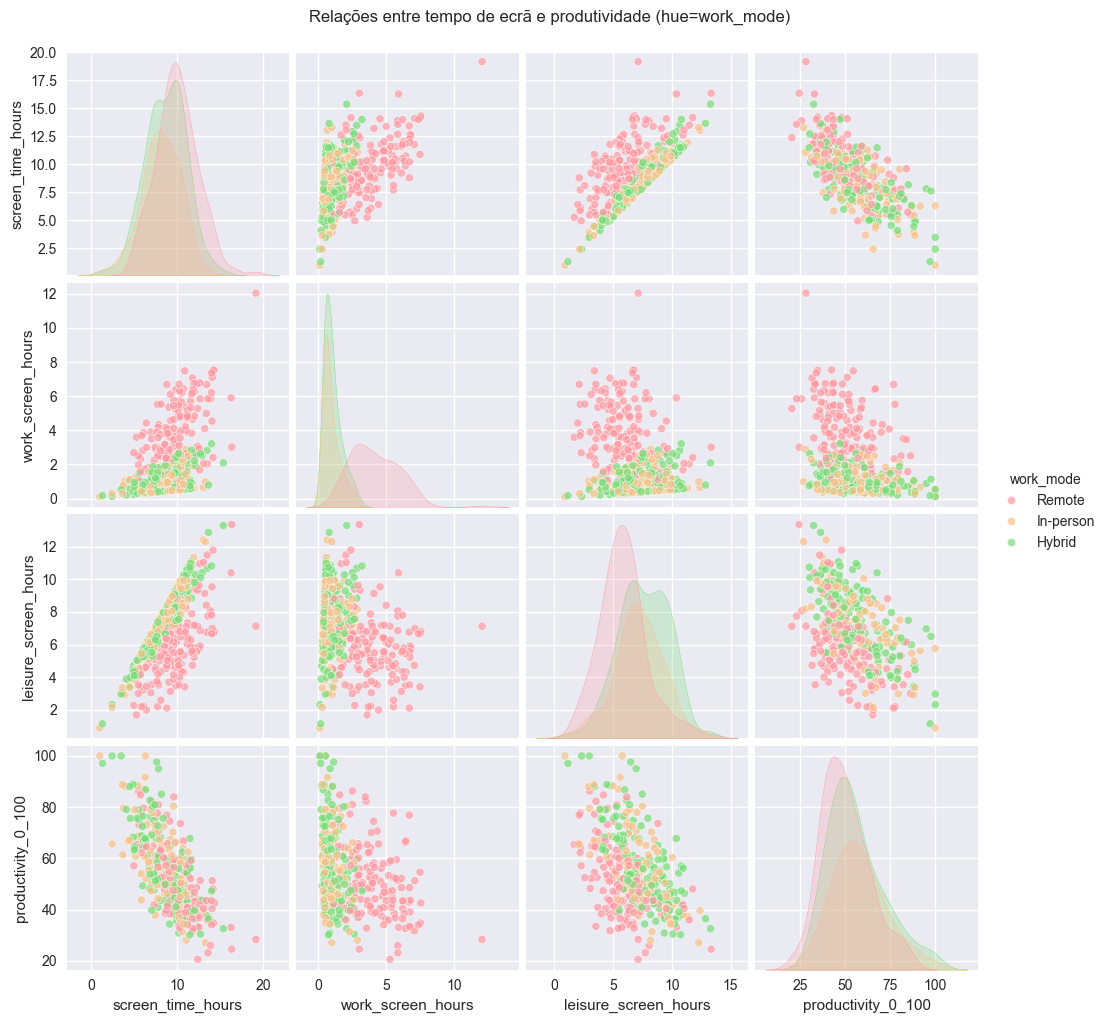

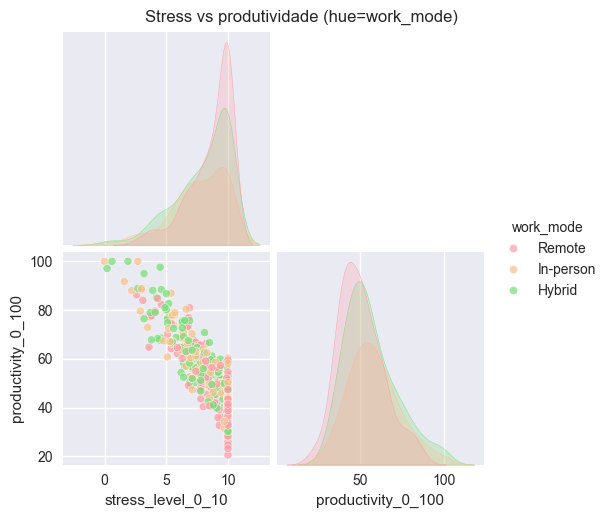

In [27]:
# Pairplot grande com hue=work_mode e KDE na diagonal (como a tua imagem)
pp_vars = [v for v in ["screen_time_hours","work_screen_hours","leisure_screen_hours","productivity_0_100"] if v in df.columns]
if len(pp_vars) == 4 and "work_mode" in df.columns:
    pal = ["#ff9aa2", "#f6c28b", "#77dd77"]  # Remote=pink, In-person=laranja claro, Hybrid=verde
    g = sns.pairplot(
        df[pp_vars + ["work_mode"]].dropna(),
        vars=pp_vars,
        hue="work_mode",
        diag_kind="kde",           # 👈 KDE na diagonal
        corner=False,
        plot_kws={"alpha":0.7, "s":35},
        palette=pal
    )
    g.fig.suptitle("Relações entre tempo de ecrã e produtividade (hue=work_mode)", y=1.02)
    plt.show()

# (se também quiseres o pairplot pequeno de stress vs produtividade com hue, mantém abaixo)
if {"work_mode","stress_level_0_10","productivity_0_100"}.issubset(df.columns):
    pal = ["#ff9aa2", "#f6c28b", "#77dd77"]
    g2 = sns.pairplot(
        df[["stress_level_0_10","productivity_0_100","work_mode"]].dropna(),
        vars=["stress_level_0_10","productivity_0_100"],
        hue="work_mode",
        diag_kind="kde",
        corner=True,
        plot_kws={"alpha":0.7, "s":35},
        palette=pal
    )
    g2.fig.suptitle("Stress vs produtividade (hue=work_mode)", y=1.02)
    plt.show()


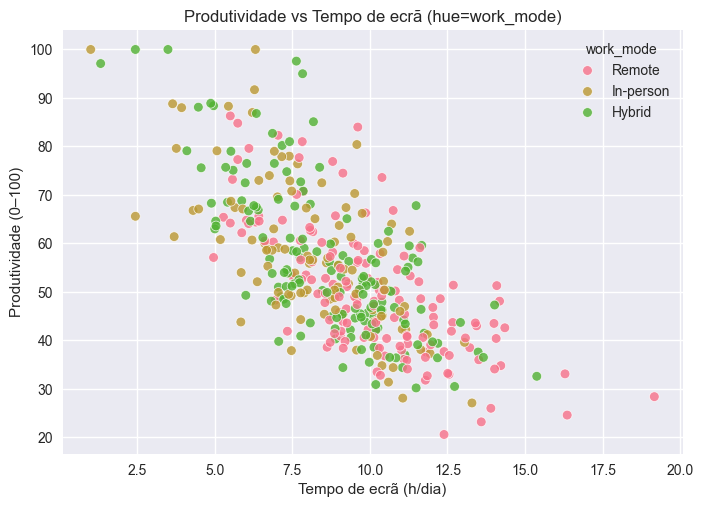

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_24072\1296478264.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="work_mode", y="productivity_0_100", data=df, palette="Set2")  # 👈 cores iguais


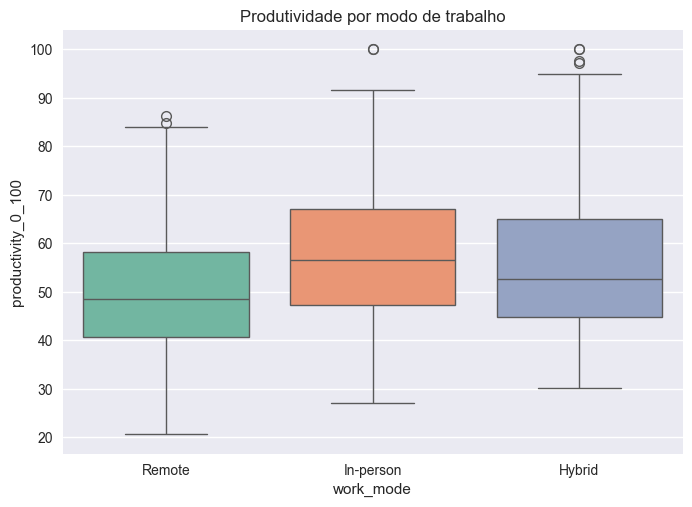

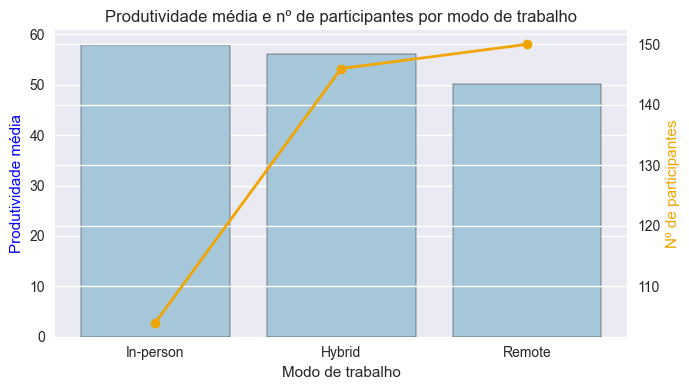

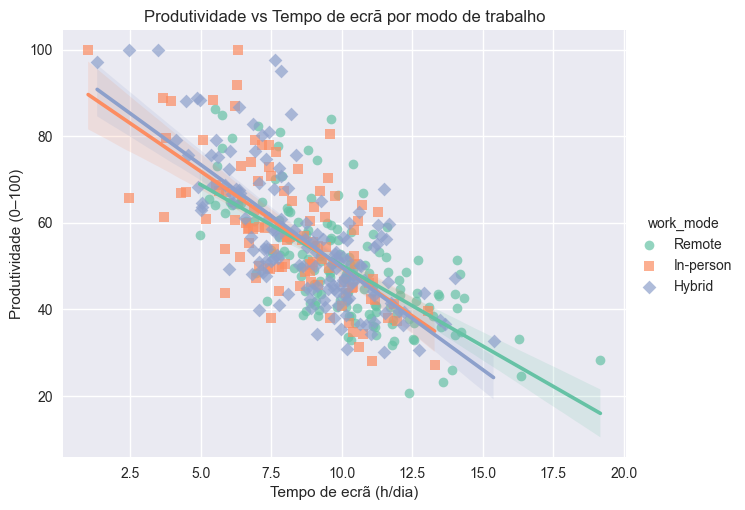

In [28]:
# scatter com hue=work_mode
if {"screen_time_hours","productivity_0_100"}.issubset(df.columns):
    sns.scatterplot(data=df, x="screen_time_hours", y="productivity_0_100",
                    hue="work_mode" if "work_mode" in df.columns else None, alpha=0.8)
    plt.title("Produtividade vs Tempo de ecrã (hue=work_mode)")
    plt.xlabel("Tempo de ecrã (h/dia)"); plt.ylabel("Produtividade (0–100)")
    plt.show()

# boxplot produtividade por modo
if {"work_mode","productivity_0_100"}.issubset(df.columns):
    
    sns.boxplot(x="work_mode", y="productivity_0_100", data=df, palette="Set2")  # 👈 cores iguais
    plt.title("Produtividade por modo de trabalho"); plt.show()

# barras + linha: média e contagem por modo
if {"work_mode","productivity_0_100"}.issubset(df.columns):
    stats = (df.groupby("work_mode")["productivity_0_100"].agg(["mean","count"])
               .sort_values("mean", ascending=False))
    fig, ax1 = plt.subplots(figsize=(7,4))
    sns.barplot(x=stats.index, y=stats["mean"], ax=ax1, color="#9ecae1", edgecolor="black")  # azul-céu
    ax1.set_ylabel("Produtividade média", color="blue"); ax1.set_xlabel("Modo de trabalho")
    ax1.set_title("Produtividade média e nº de participantes por modo de trabalho")
    ax2 = ax1.twinx()
    ax2.plot(stats.index, stats["count"], color="#f0a500", marker="o", linewidth=2)          # laranja
    ax2.set_ylabel("Nº de participantes", color="#f0a500")
    plt.tight_layout(); plt.show()


# lmplot (tendência por modo)
if {"screen_time_hours","productivity_0_100"}.issubset(df.columns) and "work_mode" in df.columns:
    pal = ["#77dd77", "#f6c28b", "#92a8d1"]  # opcional; se quiseres como no print, usa Set2
    sns.lmplot(data=df, x="screen_time_hours", y="productivity_0_100",
               hue="work_mode", markers=["o","s","D"],
               height=5, aspect=1.3, scatter_kws={'alpha':0.7},
               palette="Set2")  # 👈 igual ao print
    plt.title("Produtividade vs Tempo de ecrã por modo de trabalho")
    plt.xlabel("Tempo de ecrã (h/dia)"); plt.ylabel("Produtividade (0–100)")
    plt.show()



In [29]:
# ============================================
# 5.3 – Preparação final dos dados para modelação
# ============================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# ponto de partida: usar o df que já tens na EDA
# (não voltes a ler o CSV aqui)

df_model = df.copy()

# 1) One-Hot Encoding das variáveis categóricas
cat_cols = ["gender", "occupation", "work_mode"]
cat_cols = [c for c in cat_cols if c in df_model.columns]

df_model = pd.get_dummies(df_model, columns=cat_cols, drop_first=True, dtype=int)
print("Shape após one-hot:", df_model.shape)

# 2) Variáveis alvo (targets)

# Regressão: produtividade contínua
y_reg = df_model["productivity_0_100"]

# Classificação: produtividade em 3 níveis (low / medium / high)
y_class = pd.qcut(y_reg, q=3, labels=["low", "medium", "high"], duplicates="drop")

# 3) Features (X) – removemos só a coluna alvo
X = df_model.drop(columns=["productivity_0_100"])
print("Shape de X:", X.shape)

# 4) Divisão treino/teste (80/20)

# Regressão
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

# Classificação (estratificada)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)

print("Regressão - treino:", X_train_reg.shape, "teste:", X_test_reg.shape)
print("Classificação - treino:", X_train_clf.shape, "teste:", X_test_clf.shape)

# 5) Normalização das variáveis numéricas (para modelos / clustering)
num_cols_model = [
    "screen_time_hours",
    "work_screen_hours",
    "leisure_screen_hours",
    "sleep_hours",
    "mental_wellness_index_0_100",
    "work_screen_ratio",
    "work_leisure_ratio",
]
num_cols_model = [c for c in num_cols_model if c in X.columns]

scaler = StandardScaler()

X_train_reg_scaled = X_train_reg.copy()
X_test_reg_scaled = X_test_reg.copy()
X_train_clf_scaled = X_train_clf.copy()
X_test_clf_scaled = X_test_clf.copy()

X_train_reg_scaled[num_cols_model] = scaler.fit_transform(X_train_reg[num_cols_model])
X_test_reg_scaled[num_cols_model] = scaler.transform(X_test_reg[num_cols_model])

X_train_clf_scaled[num_cols_model] = scaler.fit_transform(X_train_clf[num_cols_model])
X_test_clf_scaled[num_cols_model] = scaler.transform(X_test_clf[num_cols_model])

print("Normalização aplicada às colunas:", num_cols_model)

# 6) Dados para clustering (sem y)
cluster_feats = [
    "screen_time_hours",
    "work_screen_hours",
    "leisure_screen_hours",
    "work_screen_ratio",
    "work_leisure_ratio",
]
cluster_feats = [c for c in cluster_feats if c in df_model.columns]

X_cluster = df_model[cluster_feats].copy()
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

print("Shape para clustering:", X_cluster.shape)


Shape após one-hot: (400, 20)
Shape de X: (400, 19)
Regressão - treino: (320, 19) teste: (80, 19)
Classificação - treino: (320, 19) teste: (80, 19)
Normalização aplicada às colunas: ['screen_time_hours', 'work_screen_hours', 'leisure_screen_hours', 'sleep_hours', 'mental_wellness_index_0_100']
Shape para clustering: (400, 3)


In [30]:
# ===============================================
# 5.4 – Cenários A, B, C, D (preparação dos dados)
# ===============================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef
)

RANDOM_STATE = 42

# df -> já está carregado no início do notebook (CSV original, sem IQR)
df_raw = df.copy()

# df_clean -> CSV limpo criado pelo pipeline (com IQR, one-hot, feature engineering)
df_clean = pd.read_csv("../Data/ScreenTime_clean.csv")

# ---------------------------
# Função helper: preparar X,y
# ---------------------------
def preparar_X_y(df_base, drop_engineered=False, feature_selection=False):
    df_tmp = df_base.copy()

    # se ainda tiver gender/occupation/work_mode em formato categórico, aplica one-hot
    cat_cols = [c for c in ["gender","occupation","work_mode"] if c in df_tmp.columns]
    if cat_cols:
        df_tmp = pd.get_dummies(df_tmp, columns=cat_cols, drop_first=True, dtype=int)

    # garante que a coluna alvo existe
    y = df_tmp["productivity_0_100"]

    # tirar target do X
    X = df_tmp.drop(columns=["productivity_0_100"])

    # retirar features de engenharia se for o caso (para Cenário B)
    if drop_engineered:
        for col in ["work_screen_ratio","work_leisure_ratio"]:
            if col in X.columns:
                X = X.drop(columns=[col])

    # feature selection (Cenário C): usar apenas subset de colunas mais relevantes
    if feature_selection:
        base_feats = [
            "age",
            "screen_time_hours",
            "work_screen_hours",
            "leisure_screen_hours",
            "mental_wellness_index_0_100",
        ]
        extra = ["work_mode_Hybrid","work_mode_Remote","gender_Female"]
        selected = [c for c in base_feats + extra if c in X.columns]
        X = X[selected]

    return X, y

# -----------------
# Definição cenários
# -----------------

cenarios = {}

# Cenário A – Sem remoção de outliers (df_raw, sem IQR, sem feature engineering)
X_A, y_A = preparar_X_y(df_raw, drop_engineered=True, feature_selection=False)
cenarios["A"] = (X_A, y_A)

# Cenário B – Com remoção de outliers (df_clean, mas sem features de engenharia)
X_B, y_B = preparar_X_y(df_clean, drop_engineered=True, feature_selection=False)
cenarios["B"] = (X_B, y_B)

# Cenário C – Feature selection (df_clean, com IQR, subset de features)
X_C, y_C = preparar_X_y(df_clean, drop_engineered=True, feature_selection=True)
cenarios["C"] = (X_C, y_C)

# Cenário D – Feature engineering (df_clean, mantendo work_screen_ratio e work_leisure_ratio)
X_D, y_D = preparar_X_y(df_clean, drop_engineered=False, feature_selection=False)
cenarios["D"] = (X_D, y_D)

for nome, (Xc, yc) in cenarios.items():
    print(f"Cenário {nome} -> X: {Xc.shape}, y: {yc.shape}")
# ===============================================
# 5.4 – Cenários A, B, C, D (preparação dos dados)
# ===============================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef
)

RANDOM_STATE = 42

# df -> já está carregado no início do notebook (CSV original, sem IQR)
df_raw = df.copy()

# df_clean -> CSV limpo criado pelo pipeline (com IQR, one-hot, feature engineering)
df_clean = pd.read_csv("../Data/ScreenTime_clean.csv")

# ---------------------------
# Função helper: preparar X,y
# ---------------------------
def preparar_X_y(df_base, drop_engineered=False, feature_selection=False):
    df_tmp = df_base.copy()

    # se ainda tiver gender/occupation/work_mode em formato categórico, aplica one-hot
    cat_cols = [c for c in ["gender","occupation","work_mode"] if c in df_tmp.columns]
    if cat_cols:
        df_tmp = pd.get_dummies(df_tmp, columns=cat_cols, drop_first=True, dtype=int)

    # garante que a coluna alvo existe
    y = df_tmp["productivity_0_100"]

    # tirar target do X
    X = df_tmp.drop(columns=["productivity_0_100"])

    # retirar features de engenharia se for o caso (para Cenário B)
    if drop_engineered:
        for col in ["work_screen_ratio","work_leisure_ratio"]:
            if col in X.columns:
                X = X.drop(columns=[col])

    # feature selection (Cenário C): usar apenas subset de colunas mais relevantes
    if feature_selection:
        base_feats = [
            "age",
            "screen_time_hours",
            "work_screen_hours",
            "leisure_screen_hours",
            "mental_wellness_index_0_100",
        ]
        extra = ["work_mode_Hybrid","work_mode_Remote","gender_Female"]
        selected = [c for c in base_feats + extra if c in X.columns]
        X = X[selected]

    return X, y

# -----------------
# Definição cenários
# -----------------

cenarios = {}

# Cenário A – Sem remoção de outliers (df_raw, sem IQR, sem feature engineering)
X_A, y_A = preparar_X_y(df_raw, drop_engineered=True, feature_selection=False)
cenarios["A"] = (X_A, y_A)

# Cenário B – Com remoção de outliers (df_clean, mas sem features de engenharia)
X_B, y_B = preparar_X_y(df_clean, drop_engineered=True, feature_selection=False)
cenarios["B"] = (X_B, y_B)

# Cenário C – Feature selection (df_clean, com IQR, subset de features)
X_C, y_C = preparar_X_y(df_clean, drop_engineered=True, feature_selection=True)
cenarios["C"] = (X_C, y_C)

# Cenário D – Feature engineering (df_clean, mantendo work_screen_ratio e work_leisure_ratio)
X_D, y_D = preparar_X_y(df_clean, drop_engineered=False, feature_selection=False)
cenarios["D"] = (X_D, y_D)

for nome, (Xc, yc) in cenarios.items():
    print(f"Cenário {nome} -> X: {Xc.shape}, y: {yc.shape}")


Cenário A -> X: (400, 19), y: (400,)
Cenário B -> X: (367, 17), y: (367,)
Cenário C -> X: (367, 8), y: (367,)
Cenário D -> X: (367, 19), y: (367,)
Cenário A -> X: (400, 19), y: (400,)
Cenário B -> X: (367, 17), y: (367,)
Cenário C -> X: (367, 8), y: (367,)
Cenário D -> X: (367, 19), y: (367,)


In [32]:
# ==================================================
# 5.4 – Avaliação dos modelos por cenário (A, B, C, D)
# ==================================================

def avaliar_cenario(X, y):
    X = X.select_dtypes(exclude="object").copy() 
    # 1) Split treino/teste (igual para Reg e Class)
    X_train, X_test, y_train_cont, y_test_cont = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    # 2) Criar classes (low/medium/high) para classificação a partir do y contínuo
    y_train_cls = pd.qcut(y_train_cont, q=3, labels=["low","medium","high"], duplicates="drop")
    y_test_cls  = pd.qcut(y_test_cont,  q=3, labels=["low","medium","high"], duplicates="drop")

    # 3) Normalização de variáveis numéricas contínuas
    num_cols_model = [
        "screen_time_hours",
        "work_screen_hours",
        "leisure_screen_hours",
        "sleep_hours",
        "mental_wellness_index_0_100",
        "work_screen_ratio",
        "work_leisure_ratio",
    ]
    num_cols_model = [c for c in num_cols_model if c in X.columns]

    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled  = X_test.copy()

    if num_cols_model:
        X_train_scaled[num_cols_model] = scaler.fit_transform(X_train[num_cols_model])
        X_test_scaled[num_cols_model]  = scaler.transform(X_test[num_cols_model])

    # 4) Regressão – RandomForestRegressor
    reg = RandomForestRegressor(
        n_estimators=400,
        random_state=RANDOM_STATE,
        n_jobs=-1
    )
    reg.fit(X_train_scaled, y_train_cont)
    y_pred_reg = reg.predict(X_test_scaled)

    mse = mean_squared_error(y_test_cont, y_pred_reg)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test_cont, y_pred_reg)
    r2  = r2_score(y_test_cont, y_pred_reg)

    reg_metrics = {
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    }

    # 5) Classificação – RandomForestClassifier
    clf = RandomForestClassifier(
        n_estimators=400,
        random_state=RANDOM_STATE,
        class_weight="balanced",
        n_jobs=-1
    )
    clf.fit(X_train_scaled, y_train_cls)
    y_pred_cls = clf.predict(X_test_scaled)

    acc = accuracy_score(y_test_cls, y_pred_cls)
    macro_f1 = f1_score(y_test_cls, y_pred_cls, average="macro")
    macro_precision = precision_score(y_test_cls, y_pred_cls, average="macro", zero_division=0)
    macro_recall    = recall_score(y_test_cls, y_pred_cls, average="macro", zero_division=0)
    mcc             = matthews_corrcoef(y_test_cls, y_pred_cls)

    clf_metrics = {
        "Accuracy": acc,
        "F1": macro_f1,
        "Recall": macro_recall,
        "Precision": macro_precision,
        "MCC": mcc
    }

    return reg_metrics, clf_metrics

# ---------------------------
# Avaliar todos os cenários
# ---------------------------

reg_results = []
clf_results = []

for nome, (Xc, yc) in cenarios.items():
    reg_m, clf_m = avaliar_cenario(Xc, yc)

    reg_m["Cenário"] = nome
    clf_m["Cenário"] = nome

    reg_results.append(reg_m)
    clf_results.append(clf_m)

# Criar DataFrames finais
resultados_reg = pd.DataFrame(reg_results).set_index("Cenário")
resultados_clf = pd.DataFrame(clf_results).set_index("Cenário")

print("=== Resultados Regressão por Cenário ===")
print(resultados_reg.round(3))
print("\n=== Resultados Classificação por Cenário ===")
print(resultados_clf.round(3))


=== Resultados Regressão por Cenário ===
           MAE   RMSE     R2
Cenário                     
A        4.845  6.296  0.790
B        4.792  6.324  0.777
C        4.848  6.239  0.783
D        4.732  6.272  0.781

=== Resultados Classificação por Cenário ===
         Accuracy     F1  Recall  Precision    MCC
Cenário                                           
A           0.750  0.750   0.749      0.752  0.625
B           0.730  0.725   0.727      0.734  0.599
C           0.770  0.763   0.767      0.768  0.659
D           0.703  0.696   0.699      0.700  0.557
